<a href="https://colab.research.google.com/github/leolaiherman/Information-Retrieval-Testing/blob/main/IRWS_set6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Retrieval Evaluation  

In this notebook, we will evaluate the performance of different information retrieval systems using various metrics. The steps include uploading necessary files, calculating precision (P) and average precision (AP), and performing statistical analysis. Follow the steps below to complete the evaluation.

## Step 1: Upload Zip File
First, we'll upload a zip file containing the qrels (query relevance) files and the system files to be tested.

In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile

zip_file_name = 'correlationTest.zip'  # Replace with the name of your zip file
extract_path = '/content'  # Replace with the path where you want to extract the contents

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


## Step 2: Calculate P and AP for Every System Topic

We will calculate the Precision (P) and Average Precision (AP) for every system-topic pair and save the results in a CSV file.

The code below can be used used by switching the #call for P@K and  # call for AP@K as well as change the depth inside the function precision_at_k or average_precision_at_k depending on the needs


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.metrics import precision_score
import csv
from tabulate import tabulate


#read the file
def load_system_run(file_path):
    system_run = defaultdict(list)
    # system_read = []
    with open(file_path, 'r') as file:
        for line in file:
          parts = line.split()
          topic = parts[0]
          iteration = parts[1]
          documentID = parts[2]
          rank = int(parts[3])
          score = float(parts[4])
          algoname = parts[5]
          # search_result = SearchResult(topic, iteration, documentID, rank, score, algoname)
          # system_read.append(search_result)
          system_run[topic].append({
                'documentID': documentID,
                'rank': rank,
                'score': score,
                'algorithm': algoname
            })
    return system_run
    # return system_read

#read qrels file
def load_qrels(file_path):
    qrels = defaultdict(lambda: defaultdict(int))
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            topic = parts[0]
            doc_id = parts[2]
            relevance = int(parts[3])
            qrels[topic][doc_id] = relevance
    return qrels

#precision_at_k
def precision_at_k(qrels_file, search_results):
    p_at_k_results = {}
    for topic, retrieved_docs in search_results.items():
        # Sort retrieved docs by rank (assuming rank 1 is highest)
        retrieved_docs = sorted(retrieved_docs, key=lambda x: x['rank'])

        # Get top k documents
        top_k_docs = retrieved_docs[:k]

        # Prepare relevance labels (1 if relevant, 0 if not relevant)
        y_true = [qrels_file[topic].get(doc['documentID'], 0) > 0 for doc in top_k_docs]
        y_pred = [1] * len(top_k_docs)  # We assume all top k docs are retrieved

        # Calculate precision at k for this topic
        precision = precision_score(y_true, y_pred)
        p_at_k_results[topic] = precision

    return p_at_k_results

#average_precision_at_k
def average_precision_at_k(qrels_file, search_results):
    ap_at_k_results = {}
    for topic, retrieved_docs in search_results.items():
        # Sort retrieved docs by rank (assuming rank 1 is highest)
        retrieved_docs = sorted(retrieved_docs, key=lambda x: x['rank'])

        # Get top k documents
        top_k_docs = retrieved_docs[:k]

        # Prepare relevance labels (1 if relevant, 0 if not relevant)
        y_true = [1 if qrels_file[topic].get(doc['documentID'], 0) > 0 else 0 for doc in top_k_docs]

        precision_at_ranks = []
        num_relevant = 0
        for i, is_relevant in enumerate(y_true):
            if is_relevant:
                num_relevant += 1
            precision = num_relevant / (i + 1)
            precision_at_ranks.append(precision)

        # Calculate Average Precision at k
        if precision_at_ranks:
            ap_at_k = sum(precision_at_ranks) / len(precision_at_ranks)
        else:
            ap_at_k = 0.0

        ap_at_k_results[topic] = ap_at_k
        precisions = ["{:.4f}".format(p) for p in precision_at_ranks]
        # Print ranks and y_true for debugging
        # print(f"Topic: {topic}, Ranks: {[doc['rank'] for doc in top_5_docs]}, y_true: {y_true}, Precisions: {precisions}")

    return ap_at_k_results

#run the function

att99ate ='/content/set6/input.att99ate'
disco1 = "/content/set6/input.disco1"
Flab8atd2 = "/content/set6/input.Flab8atd2"
GE8ATD3 = "/content/set6/input.GE8ATD3"
ibms99a = "/content/set6/input.ibms99a"
pir9Atd0 = "/content/set6/input.pir9Atd0"
READWARE = "/content/set6/input.READWARE"
acsys8aln2 = "/content/set6/input.acsys8aln2"
apl8c621 = "/content/set6/input.apl8c621"
INQ601 = "/content/set6/input.INQ601"
isa50t = "/content/set6/input.isa50t"
mds08a3 = "/content/set6/input.mds08a3"
MITSLStd = "/content/set6/input.MITSLStd"
ok8alx = "/content/set6/input.ok8alx"
Sab8A1 = "/content/set6/input.Sab8A1"


# Load qrels
qrels_file_path = '/content/set6/qrels.trec8.adhoc'
qrels = load_qrels(qrels_file_path)

# Systems array
system_all = [att99ate,disco1,Flab8atd2,GE8ATD3,ibms99a,pir9Atd0,READWARE,acsys8aln2,apl8c621,INQ601,isa50t,mds08a3,MITSLStd,ok8alx,Sab8A1]
results_table = []


# call for P@k
for value in system_all:
    search_results = load_system_run(value)
    qrels = load_qrels(qrels_file_path)
    p_at_k_results = precision_at_k(qrels, search_results)
    system_result_array =[]
    for topic, precision in p_at_k_results.items():
      metric_value = round(precision,4)
      system_result_array.append(metric_value)

    results_table.append(system_result_array)

# #call for AP@k
# for value in system_all:
#     search_results = load_system_run(value)
#     qrels = load_qrels(qrels_file_path)
#     ap_at_k_results = average_precision_at_k(qrels, search_results)
#     system_result_array =[]
#     for topic, precision in ap_at_k_results.items():
#       metric_value = round(precision,4)
#       system_result_array.append(metric_value)

#     results_table.append(system_result_array)


results_table = list(map(list, zip(*results_table)))
system_query_ids = range(401, 451)

df = pd.DataFrame(results_table, index=system_query_ids, columns=[f'System {i+1}' for i in range(len(system_all))])

print(tabulate(df, headers='keys', tablefmt='grid'))

df.to_csv('P@100.csv', index=False)




+-----+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+
|     |   System 1 |   System 2 |   System 3 |   System 4 |   System 5 |   System 6 |   System 7 |   System 8 |   System 9 |   System 10 |   System 11 |   System 12 |   System 13 |   System 14 |   System 15 |
+=====+============+============+============+============+============+============+============+============+============+=============+=============+=============+=============+=============+=============+
| 401 |       0.32 |     0      |       0.04 |       0.17 |       0.06 |       0.05 |     0.8148 |       0.42 |       0.58 |        0.06 |      0.03   |        0.13 |        0.2  |        0.11 |        0.15 |
+-----+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+------------

## Step 3: Calculate the Average P and AP for Every System

Next, we'll calculate the average precision and average average precision for each system and save the results in a CSV file.

From the available csv file, we'll just need to upload the file and the code below will generate the csv file that contains the average of every given systems.

The code will run the file format as follows:



In [ ]:
import csv
from statistics import mean

def calculate_average_scores(csv_file_path):
    scores = {}

    # Read the CSV file
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)

        # Initialize the dictionary with headers
        for header in reader.fieldnames:
            scores[header] = []

        # Populate the scores dictionary
        for row in reader:
            for header in reader.fieldnames:
                # Convert score to float, if possible, and append to the list
                try:
                    score = float(row[header])
                    scores[header].append(score)
                except ValueError:
                    # Skip non-numeric values
                    continue

    # Calculate average scores for each column
    average_scores = {}
    for header, values in scores.items():
        if values:  # Check if the list is not empty
            average_scores[header] = round(mean(values), 4)  # Calculate and round the average to 4 decimal points
        else:
            average_scores[header] = None  # Handle columns with no numeric values

    return average_scores

def write_average_scores_to_csv(average_scores, output_file_path):
    # Write the results to a new CSV file
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write the header
        writer.writerow(['System', 'Average Score'])

        # Write the average scores
        for column, avg_score in average_scores.items():
            writer.writerow([column, avg_score])

# Example usage
csv_file_path = '/content/AP@50.csv'
output_file_path = 'MAP@50.csv'
average_scores = calculate_average_scores(csv_file_path)
write_average_scores_to_csv(average_scores, output_file_path)


# Print the results
for column, avg_score in average_scores.items():
    print(f"{column}: {avg_score}")



## Step 4: Calculate Correlation Coefficient

Using the average precision and average average precision, we will calculate the correlation coefficient to compare system performance rankings with the two different metrics.

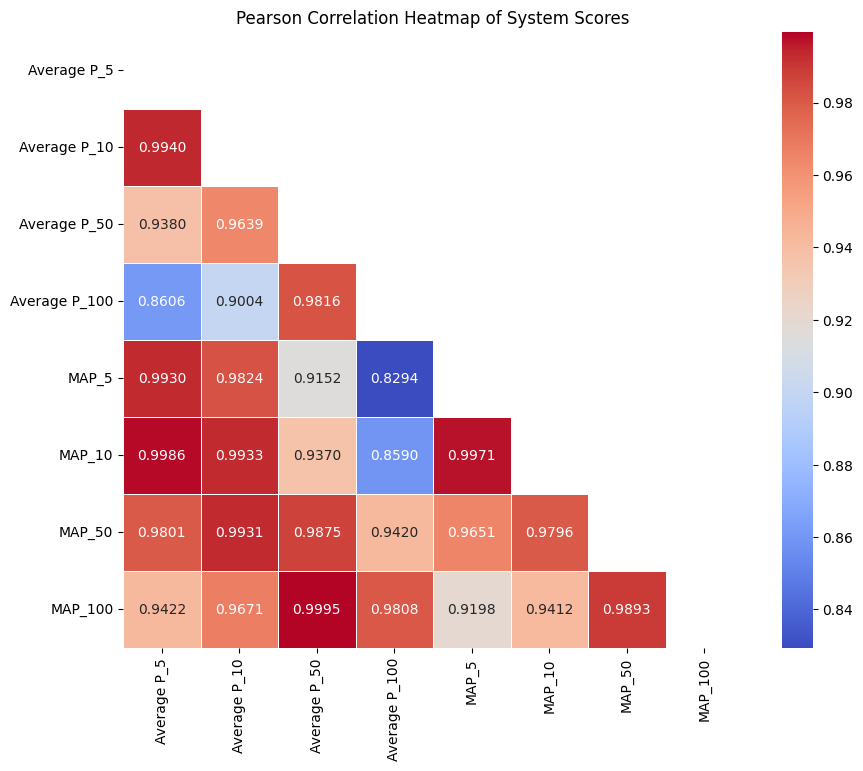

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/content/correlationTest.csv'
data = pd.read_csv(file_path, index_col=0)

# Calculate the Pearson correlation matrix
pearson_correlation_matrix = data.corr(method='pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Pearson Correlation Heatmap of System Scores')
plt.show()



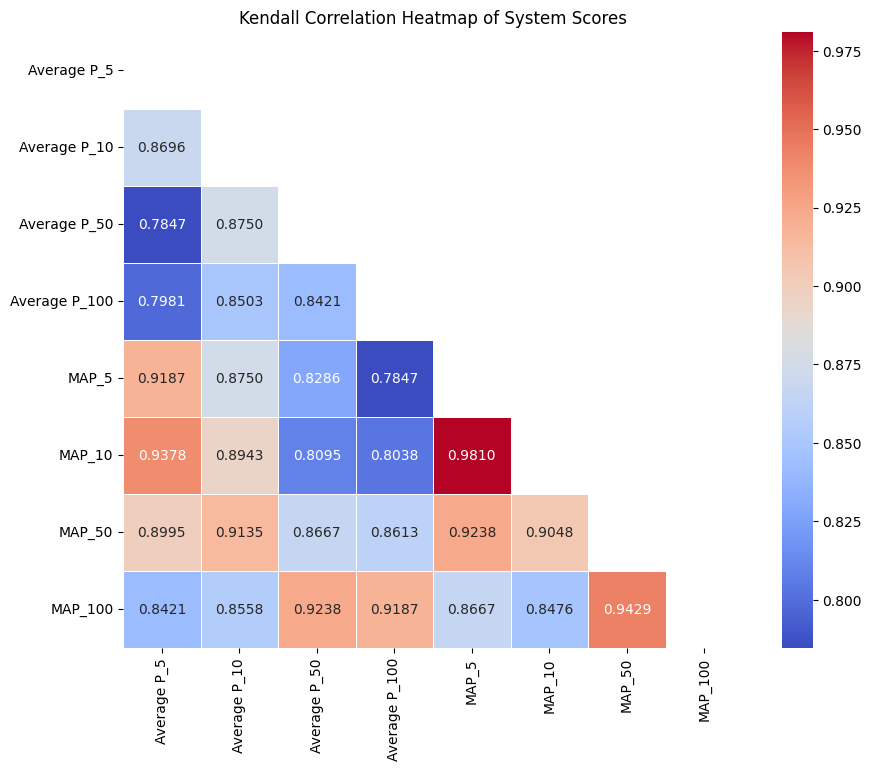

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/content/correlationTest.csv'
data = pd.read_csv(file_path, index_col=0)

# Calculate the Pearson correlation matrix
pearson_correlation_matrix = data.corr(method='kendall')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Kendall Correlation Heatmap of System Scores')
plt.show()


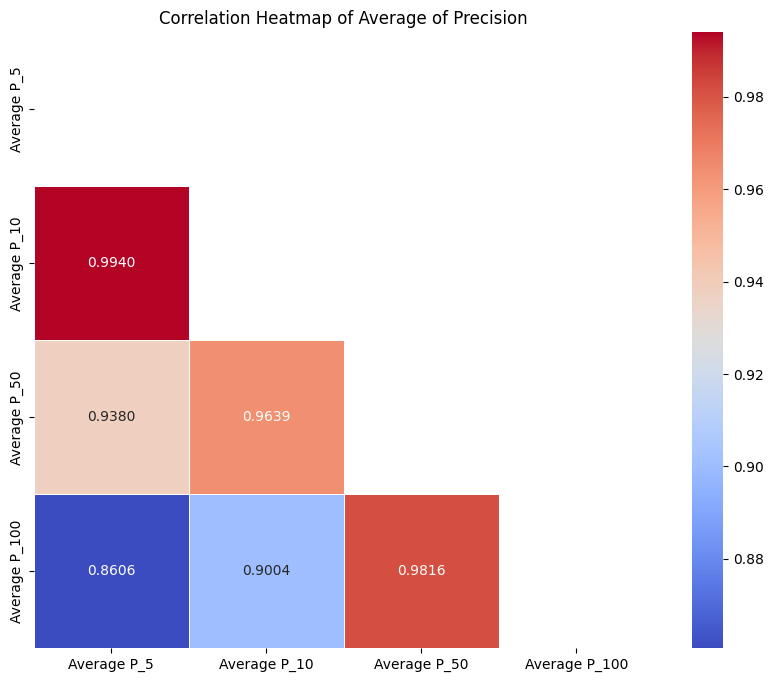

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/content/correlationTestaverageP.csv'
data = pd.read_csv(file_path, index_col=0)

# Calculate the Pearson correlation matrix
pearson_correlation_matrix = data.corr(method='pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation Heatmap of Average of Precision')
plt.show()

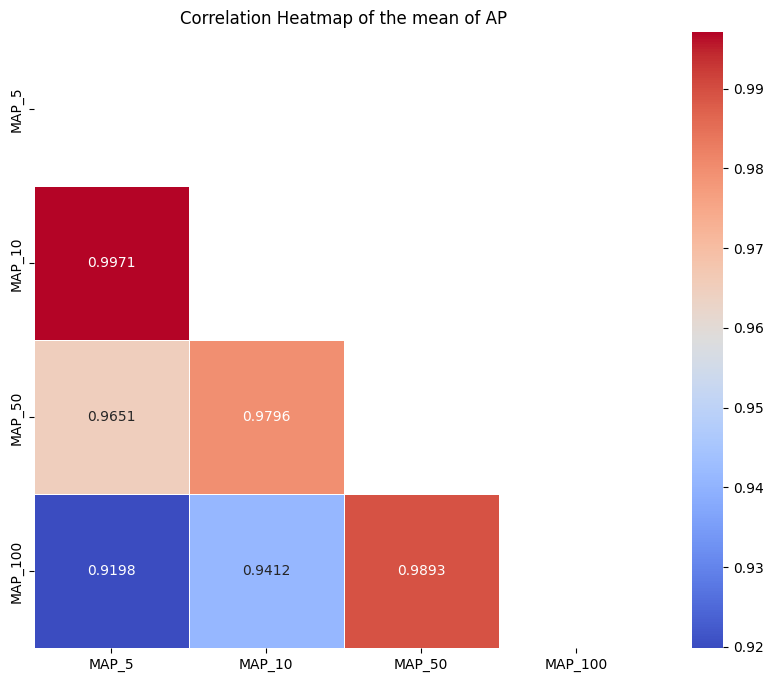

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/content/correlationTestMAP.csv'
data = pd.read_csv(file_path, index_col=0)

# Calculate the Pearson correlation matrix
pearson_correlation_matrix = data.corr(method='pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation Heatmap of the mean of AP')
plt.show()

## Step 5: Conduct Significance Testing
Finally, we will perform significance testing on the precision and average precision scores to determine if the differences in performance are statistically significant.

In [ ]:
from scipy.stats import ttest_rel

# Sample data (paired samples)
# data1 = [12, 11, 13, 11, 12, 11, 12]
# data2 = [14, 15, 13, 15, 14, 15, 14]
data1 = [0.4, 0.6, 0.8, 0.9, 0.2, 0.3]
data2 = [0.0, 0.0, 0.4, 0.1, 0.0, 0.2]


# Perform the paired t-test
t_stat, p_value = ttest_rel(data1, data2, alternative='greater')  # alternative can be 'less', 'greater', or 'two-sided'
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: 3.982831174232289, p-value: 0.005250545482846628


In [ ]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_rel

# Load the CSV file containing precision@10 scores for all systems
file_path = '/content/newCalcresult/P@10.csv'
data = pd.read_csv(file_path)

# Get the list of systems
systems = data.columns

# Initialize a list to store the t-test results for each pair of systems
t_test_results = []

# Generate all pairs of systems
system_pairs = combinations(systems, 2)

# Perform one-tailed paired t-test for each pair of systems
for system1, system2 in system_pairs:
    # Get the precision@10 scores for the pair of systems
    system1_scores = data[system1]
    system2_scores = data[system2]

    # Perform one-tailed paired t-test between the pair of systems
    t_stat, p_value = ttest_rel(system1_scores, system2_scores, alternative='less')

    # Store the t-test results for the pair of systems
    t_test_results.append((system1, system2, t_stat, p_value))

# Create a DataFrame to organize the t-test results
results_df = pd.DataFrame(t_test_results, columns=['System 1', 'System 2', 't-statistic', 'p-value'])

# Display the t-test results
print("Pairwise One-Tailed t-Test Results:")
print(results_df)



Pairwise One-Tailed t-Test Results:
      System 1   System 2  t-statistic       p-value
0     System 1   System 2     7.774064  2.119538e-10
1     System 1   System 3    -0.324385  6.264863e-01
2     System 1   System 4    -0.181813  5.717603e-01
3     System 1   System 5    -0.866070  8.046638e-01
4     System 1   System 6    -0.418143  6.611654e-01
..         ...        ...          ...           ...
100  System 12  System 14    -5.116210  9.999974e-01
101  System 12  System 15    -1.779758  9.593413e-01
102  System 13  System 14    -2.128986  9.808467e-01
103  System 13  System 15     1.038383  1.520944e-01
104  System 14  System 15     3.004756  2.090246e-03

[105 rows x 4 columns]


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel

# Load the CSV file containing precision@10 scores for all systems
file_path = '/content/newCalcresult/P@10.csv'
data = pd.read_csv(file_path)  # Assuming the first column contains the topic IDs

# Get the list of systems
systems = data.columns

# Initialize an empty dictionary to store t-statistics and p-values for each pair
t_test_results = {}

# Perform pairwise one-tailed t-tests for all pairs of systems
for i, system_i in enumerate(systems):
    for j, system_j in enumerate(systems):
        if i < j:  # Only calculate each pair once to avoid redundancy
            # Perform one-tailed paired t-test
            t_stat, p_value = ttest_rel(data[system_i], data[system_j], alternative='greater')
            # Store the results
            t_test_results[(system_i, system_j)] = {'t-statistic': t_stat, 'p-value': p_value}

# Create a DataFrame to organize the results into a table
results_table = pd.DataFrame(index=systems, columns=systems)

# Fill the DataFrame with the p-values formatted to 4 decimal places
for (system_i, system_j), result in t_test_results.items():
    results_table.loc[system_i, system_j] = '{:.4f}'.format(result['p-value'])

# Save the results table to a CSV file
results_table.to_csv('t_test_P@10.csv')

print("Results saved to t_test_results.csv")



Results saved to t_test_P@10.csv


Here's the example output of the t-test for P@10 and AP@100


P@10:
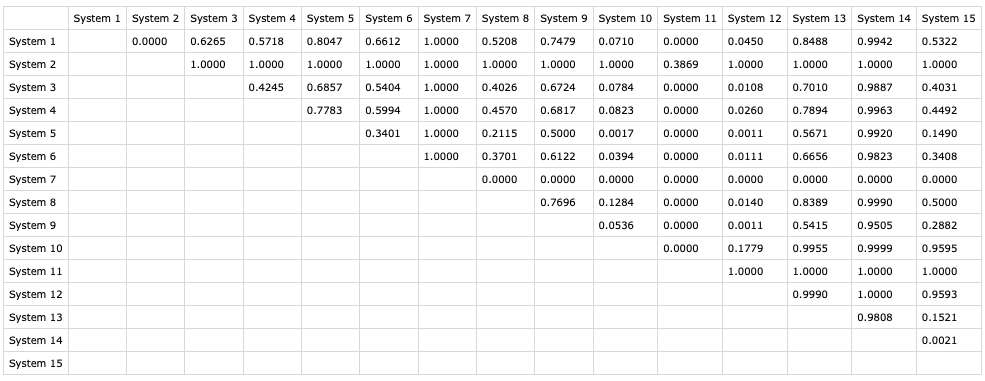

AP@100:
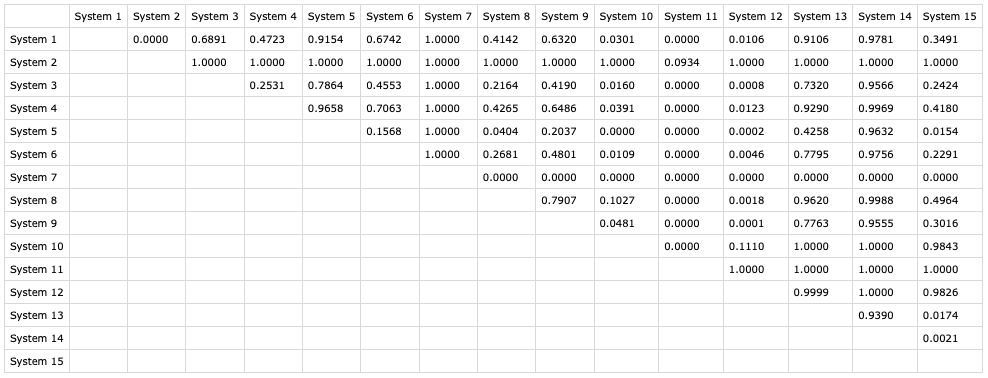
